In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import os

In [2]:
import os
from PIL import Image
import numpy as np
# Directory containing your images
directory_path = "F:/AAST/SEMESTER 7/Deep Leerning/paper/dataset/train/class (9)"
directory_path1 = "F:/AAST/SEMESTER 7/Deep Leerning/paper/dataset/train/class (10)"
directory_path2 = "F:/AAST/SEMESTER 7/Deep Leerning/paper/dataset/test/class (9)"
directory_path3 = "F:/AAST/SEMESTER 7/Deep Leerning/paper/dataset/test/class (10)"


# Initialize an empty list to store the images and labels
x_train = []
y_train = []

x_test = []
y_test = []

# Iterate through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".jpg"):
        # Construct the full file path
        image_path = os.path.join(directory_path, filename)

        # Read the image using Pillow
        image = Image.open(image_path)

        # Append the image to the list
        x_train.append(image)
        
        # Assign a label of 0 to the image
        y_train.append(0)

for filename in os.listdir(directory_path1):
    if filename.endswith(".jpg"):
        # Construct the full file path
        image_path = os.path.join(directory_path1, filename)

        # Read the image using Pillow
        image = Image.open(image_path)

        # Append the image to the list
        x_train.append(image)
        
        # Assign a label of 0 to the image
        y_train.append(1)

for filename in os.listdir(directory_path2):
    if filename.endswith(".jpg"):
        # Construct the full file path
        image_path = os.path.join(directory_path2, filename)

        # Read the image using Pillow
        image = Image.open(image_path)

        # Append the image to the list
        x_test.append(image)
        
        # Assign a label of 0 to the image
        y_test.append(0)

for filename in os.listdir(directory_path3):
    if filename.endswith(".jpg"):
        # Construct the full file path
        image_path = os.path.join(directory_path3, filename)

        # Read the image using Pillow
        image = Image.open(image_path)

        # Append the image to the list
        x_test.append(image)
        
        # Assign a label of 0 to the image
        y_test.append(1)


# Convert the list of images to a numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)


In [3]:
# Print the dataset shape
print(x_train.shape)
for label in y_train:
    print(label)

print(x_test.shape)
for label in y_test:
    print(label)

(104, 256, 256, 3)
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
(24, 256, 256, 3)
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1


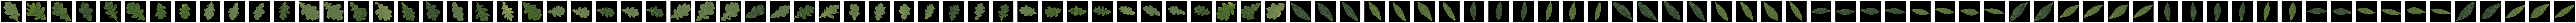

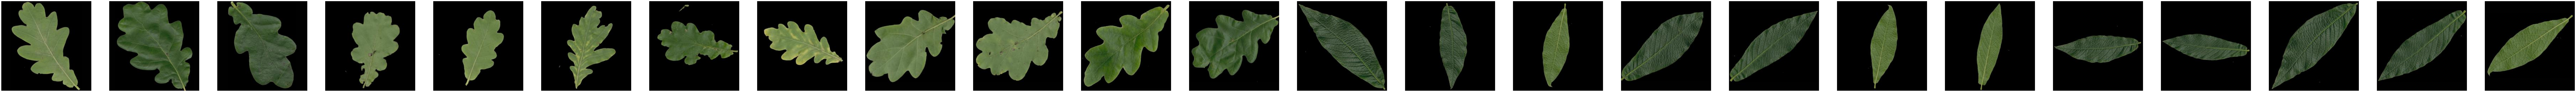

In [4]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(256, 256))
    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# Display images in the train array
show_images(x_train)

# Display images in the test array
show_images(x_test)

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)


def augment_dataset(dataset):
    augmented_data = []
    for img in dataset:
        img = np.expand_dims(img, axis=0)  
        for _ in range(8):  
            seed = np.random.randint(0, 1000)  
            for batch in datagen.flow(img, batch_size=1, seed=seed):
                augmented_data.append(np.squeeze(batch))  
                break  
    return np.array(augmented_data)
x_train_augmented = augment_dataset(x_train)
y_train_augmented = np.repeat(y_train,8, axis=0)  
x_test_augmented = augment_dataset(x_test)
y_test_augmented = np.repeat(y_test,8, axis=0)

In [7]:
y_train_augmented 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
print(x_train_augmented.shape)
print(y_train_augmented.shape)
print(x_test.shape)
print(y_test.shape)

(832, 256, 256, 3)
(832,)
(24, 256, 256, 3)
(24,)


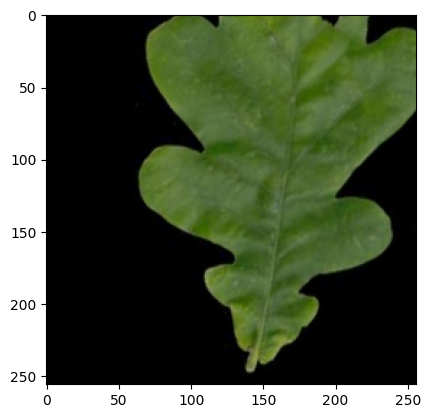

In [9]:
plt.imshow(x_train_augmented[10])
plt.show()

In [10]:
from sklearn.utils import shuffle

# Combine original data with augmented data
X_train_combined = np.concatenate((x_train, x_train_augmented))
y_train_combined = np.concatenate((y_train, y_train_augmented))

X_test_combined = np.concatenate((x_test, x_test_augmented))
y_test_combined = np.concatenate((y_test, y_test_augmented))

# Shuffle the combined data
X_train_combined, y_train_combined = shuffle(X_train_combined, y_train_combined, random_state=42)
X_test_combined, y_test_combined = shuffle(X_test_combined, y_test_combined, random_state=42)

In [11]:
print(y_train_combined.shape)
print(y_test_augmented.shape)

(936,)
(192,)


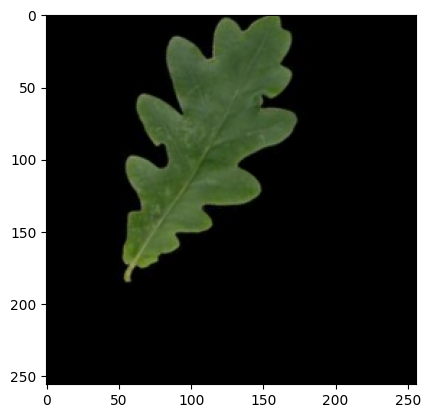

In [12]:
# plt.imshow(X_test_combined[3])
plt.imshow(X_train_combined[80])
plt.show()
#X_train_combined

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential




# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

# Create a new model by adding a global average pooling layer and a dense output layer
model = Sequential()
model.add(vgg16_model)
# model.add(Dropout(0.5))

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))


# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               3

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.metrics import AUC, Recall, Precision, SpecificityAtSensitivity, SensitivityAtSpecificity, FalseNegatives, FalsePositives, TrueNegatives, TruePositives,F1Score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# Define the metrics
metrics = [
    AUC(name='auc'),
    Recall(name='recall'),
    Precision(name='precision'),
    SpecificityAtSensitivity(0.5, name='specificity'),
    SensitivityAtSpecificity(0.5, name='sensitivity'),
    FalseNegatives(name='fn'),
    FalsePositives(name='fp'),
    TrueNegatives(name='tn'),
    TruePositives(name='tp'),
    F1Score(name='f1_score'),
    'accuracy']

# Compile the model
model.compile(optimizer='adam' , loss='binary_crossentropy', metrics=metrics)



In [15]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=3
)


# Fit the model
history = model.fit(X_train_combined, y_train_combined.astype("float32"), validation_split=0.2, epochs=5, batch_size=32, callbacks=[early_stopping])


Epoch 1/5
24/24 [==============================] - 76s 3s/step - loss: 2.8976 - auc: 0.5280 - recall: 0.5134 - precision: 0.5066 - specificity: 0.5452 - sensitivity: 0.5323 - fn: 181.0000 - fp: 186.0000 - tn: 190.0000 - tp: 191.0000 - f1_score: 0.6606 - accuracy: 0.5094 - val_loss: 0.6924 - val_auc: 0.8939 - val_recall: 1.0000 - val_precision: 0.5106 - val_specificity: 0.9674 - val_sensitivity: 0.9583 - val_fn: 0.0000e+00 - val_fp: 92.0000 - val_tn: 0.0000e+00 - val_tp: 96.0000 - val_f1_score: 0.6761 - val_accuracy: 0.5106
Epoch 2/5
24/24 [==============================] - 76s 3s/step - loss: 1.0553 - auc: 0.5581 - recall: 0.5457 - precision: 0.5328 - specificity: 0.5532 - sensitivity: 0.6237 - fn: 169.0000 - fp: 178.0000 - tn: 198.0000 - tp: 203.0000 - f1_score: 0.6643 - accuracy: 0.5361 - val_loss: 0.6130 - val_auc: 0.9998 - val_recall: 1.0000 - val_precision: 0.9796 - val_specificity: 1.0000 - val_sensitivity: 1.0000 - val_fn: 0.0000e+00 - val_fp: 2.0000 - val_tn: 90.0000 - val_tp: 

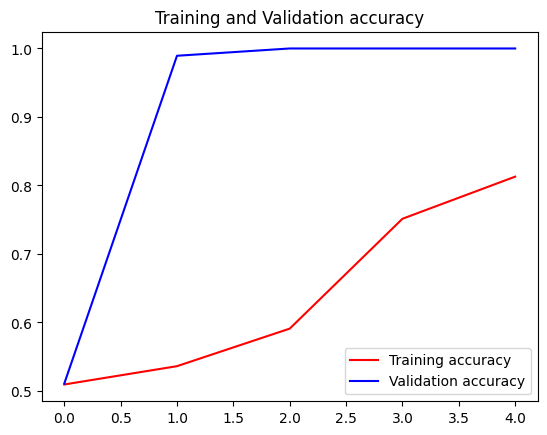

<Figure size 640x480 with 0 Axes>

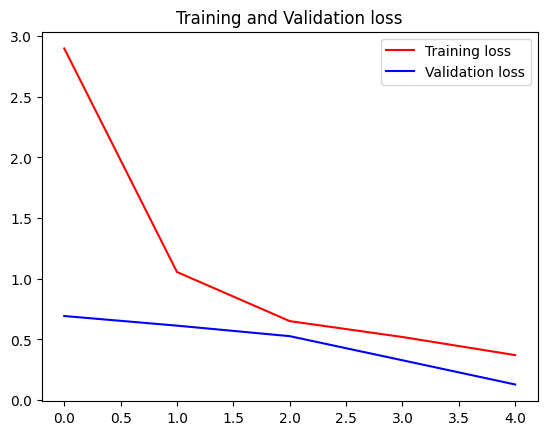

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [17]:
model.evaluate(x_test_augmented,y_test_augmented.astype('float32'))

6/6 [==============================] - 15s 2s/step - loss: 0.1303 - auc: 1.0000 - recall: 1.0000 - precision: 1.0000 - specificity: 1.0000 - sensitivity: 1.0000 - fn: 0.0000e+00 - fp: 0.0000e+00 - tn: 96.0000 - tp: 96.0000 - f1_score: 0.6667 - accuracy: 1.0000                 


[0.130252406001091,
 0.9999999403953552,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 96.0,
 96.0,
 array([0.6666667], dtype=float32),
 1.0]